(a) Toy dataset : Two Spirals

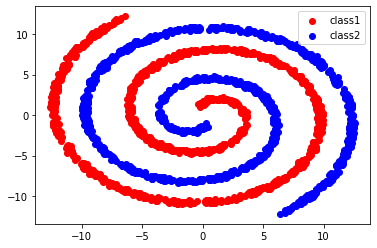

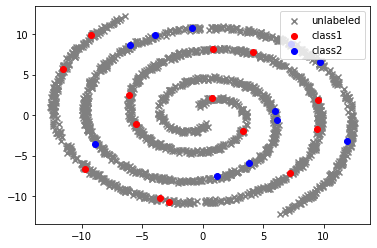

In [11]:
%matplotlib inline
import numpy as np
import math
import toydataset as dataset
import scatterutils
from scipy.spatial.distance import cdist
from scipy.linalg import fractional_matrix_power

n_points = 1000
n_labeled = 25  # in (0,n_points)
alpha = 0.99    # in (0,1)
sigma = 0.2
n_iteration = 400

# create two spirals
X, ideal_Y = dataset.create_spirals(n_points, 0.5)

# show ideal classification
scatterutils.show_scatter_spirals(X, ideal_Y)

Y = np.zeros_like(X)
initial_Y = np.zeros_like(ideal_Y)
random_y = np.random.randint(0, 2*n_points, n_labeled)
for i in range(0, n_labeled):
    index = random_y[i]
    Y[index, 0 if ideal_Y[index] == 1 else 1] = 1
    if index < n_points: initial_Y[index] = 1
    else: initial_Y[index] = 2

# show initial n_labeled
scatterutils.show_scatter_spirals(X, initial_Y, True)

(b)-1. Form th affinity matrix W

In [12]:
def rbf_kernel(x, y):
    distance = cdist(x, y, 'euclidean')
    return np.exp(-distance / (2 * math.pow(sigma, 2)))

W = rbf_kernel(X, X)
np.fill_diagonal(W, 0)

(b)-2. Construct the matrix S = D^(-1/2)*W*D^(-1/2)
   in which D is a diagonal matrix with its (i, i)-element equal to the sum of the i-th row of W.

In [13]:
row_sum = np.sum(W, 1)
D = fractional_matrix_power(np.diag(row_sum), -0.5)
S = np.dot(np.dot(D, W), D)

(b)-3. Iterate F(t+1) = a*S*F(t)+(1-a)*Y
(b)-4. Let F denote the limit of the sequence {F(t)}.

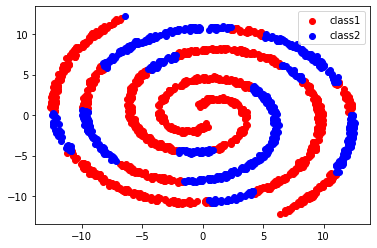

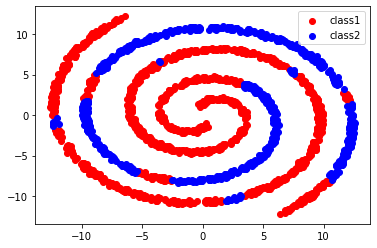

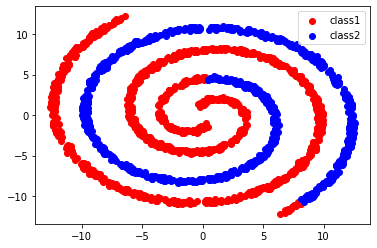

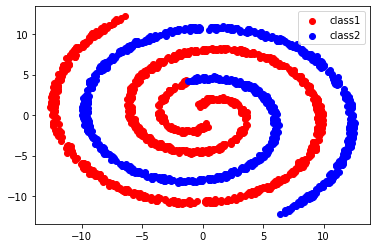

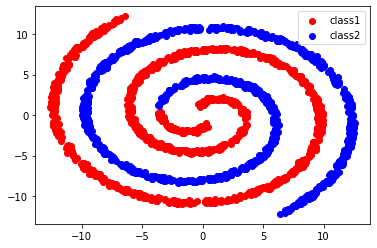

In [14]:
F = Y
func_F = lambda f : alpha * np.dot(S, f) + (1 - alpha) * Y

def show_result(f):
    result = np.ones_like(f)
    result[np.arange(len(f)), np.argmax(f, 1)] = 2
    result_y = np.array([y[1] for y in result])
    scatterutils.show_scatter_spirals(X, result_y)

for t in range(n_iteration):
    F = func_F(F)
    if t == 1:
        show_result(F)
    if t == 10:
        show_result(F)
    elif t == 50:
        show_result(F)
    elif t == 80:
        show_result(F)
    elif t == 399:
        show_result(F)

(d) F*

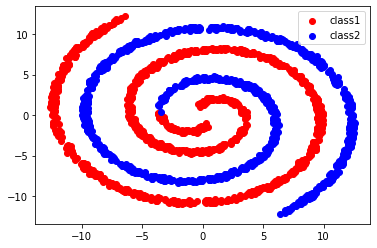

In [15]:
F_star = np.dot(fractional_matrix_power((np.eye(len(S)) - alpha * S), -1), Y)
show_result(F_star)